In [1]:
from utils.helper import Helper
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import cm
from tensorflow.keras.models import load_model, Sequential, Model
import tensorflow as tf
import cv2

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.regularizers import l2

from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

In [3]:
!nvidia-smi

Sat Aug 15 15:56:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.100      Driver Version: 440.100      CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0  On |                  N/A |
| 39%   61C    P0    46W / 180W |    639MiB /  8117MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

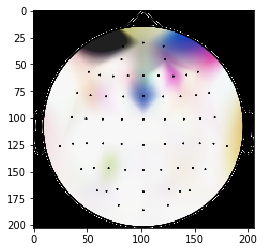

In [4]:
topo = cv2.imread("data/topomaps_RT_100_w_sub/test/combined/0/bts_12515.png", cv2.IMREAD_COLOR)
plt.imshow(topo)

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
h = Helper('data/topomaps_RT_50_w_sub_h1/train/combined', 'data/topomaps_RT_50_w_sub_h1/test/combined', 'results/RT_50')
train_it, test_it = h.construct_data_generator(target_size=(128,128), shuffle=True)

Found 46893 images belonging to 3 classes.
Found 15632 images belonging to 3 classes.


In [3]:
def base_model():
    model = Sequential()
    
    model.add(Conv2D(36, (3,3), input_shape=(128,128,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))    
    model.add(Conv2D(36, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu")) 
    model.add(MaxPool2D())
    
    model.add(Conv2D(72, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))   
    model.add(Conv2D(72, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))  
    model.add(MaxPool2D())
    
    model.add(Conv2D(144, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))  
    model.add(Conv2D(144, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPool2D())
    
#     model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(MaxPool2D())
    
#     model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(MaxPool2D())
    
#     model.add(Conv2D(128, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(MaxPool2D())
    
#     model.add(Conv2D(256, (3,3), kernel_initializer=GlorotUniform(22), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation("relu")) 
#     model.add(MaxPool2D())
    
    
    
    model.add(Flatten())
    
#     model.add(Dense(1024, kernel_initializer=GlorotUniform(22), 
#                     kernel_regularizer=l2(), activity_regularizer=l2(), bias_regularizer=l2()))
#     model.add(Activation("relu"))
#     model.add(Dropout(0.3))
    
    model.add(Dense(1024))
    model.add(Activation("relu"))
    
    model.add(Dense(700))
    model.add(Activation("relu"))
    
    
    model.add(Dense(3, activation='softmax'))
    
    model.summary()
    
    
    return model

In [4]:
model = base_model()

tb = TensorBoard(log_dir='Tensorboard/RT_50/')
ch = ModelCheckpoint("models/base_model_RT_h1.h5", monitor='val_accuracy')

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 36)      1008      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 36)      144       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 36)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 36)      11700     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 36)      144       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 36)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 36)        0

In [5]:
h_r = model.fit_generator(train_it, validation_data=test_it, epochs=40, callbacks=[tb,ch])

Epoch 1/40
367/367 [==============================] - 165s 449ms/step - loss: 0.9399 - accuracy: 0.5192 - val_loss: 1.0683 - val_accuracy: 0.3962
Epoch 2/40
367/367 [==============================] - 161s 438ms/step - loss: 0.7652 - accuracy: 0.6334 - val_loss: 0.7949 - val_accuracy: 0.6140
Epoch 3/40
367/367 [==============================] - 161s 439ms/step - loss: 0.6695 - accuracy: 0.6932 - val_loss: 0.6291 - val_accuracy: 0.7193
Epoch 4/40
367/367 [==============================] - 161s 440ms/step - loss: 0.5990 - accuracy: 0.7351 - val_loss: 0.6238 - val_accuracy: 0.7169
Epoch 5/40
367/367 [==============================] - 161s 440ms/step - loss: 0.5495 - accuracy: 0.7585 - val_loss: 0.6370 - val_accuracy: 0.7114
Epoch 6/40
367/367 [==============================] - 161s 439ms/step - loss: 0.5051 - accuracy: 0.7839 - val_loss: 0.5170 - val_accuracy: 0.7771
Epoch 7/40
367/367 [==============================] - 164s 446ms/step - loss: 0.4682 - accuracy: 0.8028 - val_loss: 0.5061 -

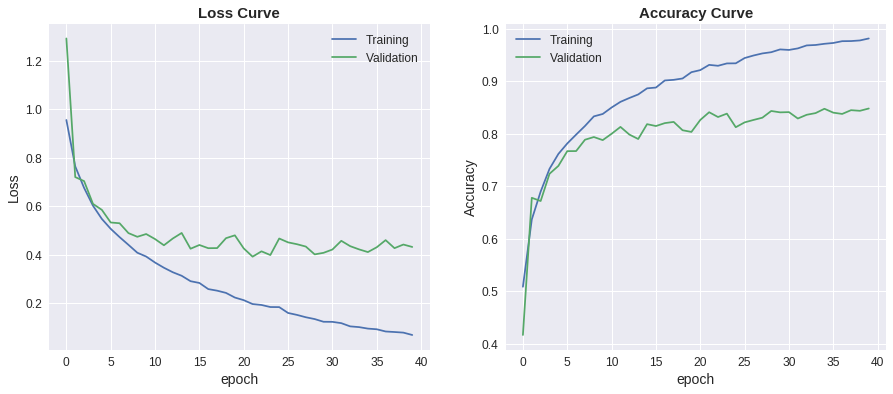

In [7]:
history = h_r.history
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
plt.style.use('seaborn')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

axs[0].set_title("Loss Curve", fontdict={'size':15, 'weight':'bold'})
axs[0].plot(history['loss'], label='Training')
axs[0].plot(history['val_loss'], label='Validation')
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].set_title("Accuracy Curve", fontdict={'size':15, 'weight':'bold'})
axs[1].plot(history['accuracy'], label='Training')
axs[1].plot(history['val_accuracy'], label='Validation')
axs[1].set_xlabel("epoch")
axs[1].set_ylabel("Accuracy")
axs[1].legend(loc='best')

In [6]:
model = load_model("models/66dc9_RT_50.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 36) 2736        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 36) 144         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 36)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
evaluate = model.evaluate_generator(train_it)
evaluate

[0.8067464771213474, 0.8109844]

In [41]:
base_model = model
STARTING_L2_REG = 0.0007
flatten_layer = model.layers[-6].output
dense = Dense(1124, activation='relu', kernel_regularizer=l2(STARTING_L2_REG * 2.775875235712867))(flatten_layer)

dense_1 = Dense(766, activation='relu', kernel_regularizer=l2(STARTING_L2_REG * 2.775875235712867))(dense)

dense_2 = Dense(3, activation='softmax', kernel_regularizer=l2(STARTING_L2_REG * 2.775875235712867))(dense_1)


fine_model = Model(base_model.input, dense_2)

for layer in fine_model.layers[:30]:
    layer.trainable = False
    
fine_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 36) 2736        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 36) 144         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 36)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [46]:
tb = TensorBoard(log_dir='Tensorboard/RT_50/')
ch = ModelCheckpoint("models/fine_tune_RT_50.h5", monitor='val_accuracy')

fine_model.compile(optimizer=RMSprop(0.000007023), loss='categorical_crossentropy', metrics=['accuracy'])

h_r = fine_model.fit_generator(train_it, validation_data=test_it, epochs=100, callbacks=[tb,ch])

Epoch 1/100
391/391 [==============================] - 242s 620ms/step - loss: 7.3967 - accuracy: 0.3869 - val_loss: 6.8532 - val_accuracy: 0.5577
Epoch 2/100
391/391 [==============================] - 243s 621ms/step - loss: 6.8161 - accuracy: 0.5459 - val_loss: 6.7348 - val_accuracy: 0.5395
Epoch 3/100
391/391 [==============================] - 243s 620ms/step - loss: 6.4665 - accuracy: 0.6337 - val_loss: 6.3357 - val_accuracy: 0.6578
Epoch 4/100
391/391 [==============================] - 242s 618ms/step - loss: 6.1576 - accuracy: 0.7050 - val_loss: 6.0724 - val_accuracy: 0.7047
Epoch 5/100
391/391 [==============================] - 242s 619ms/step - loss: 5.9175 - accuracy: 0.7390 - val_loss: 5.8833 - val_accuracy: 0.7187
Epoch 6/100
391/391 [==============================] - 242s 619ms/step - loss: 5.7224 - accuracy: 0.7607 - val_loss: 5.7200 - val_accuracy: 0.7355
Epoch 7/100
391/391 [==============================] - 242s 620ms/step - loss: 5.5230 - accuracy: 0.7962 - val_loss: 5